# Imports

# Methods

Methods for Identification 

Methods for Generation of Outcomes: $Y_{i} = \mu(X_{i}) + \varepsilon_i$

$Y_{i}$ from Noak and Rothe 2023 donut RDD paper: 
$\newline \mu_N(x)=sign(x)*x^2-L*sign(x)((x-\delta*sign(x))^2-\delta^2*sign(x))*\boldsymbol{1}\{|x|<\delta\}$

Basic linear outcomes ($Y_{i}$) plus simple treatment effect: $\quad \mu_{BL}(x)= \alpha + \beta x + \tau t$

# Sample Generation 

Seed Set-up

In [5]:
sd = np.random.default_rng(seed=42)
print(sd)

Generator(PCG64)


Test Generate Sample Command

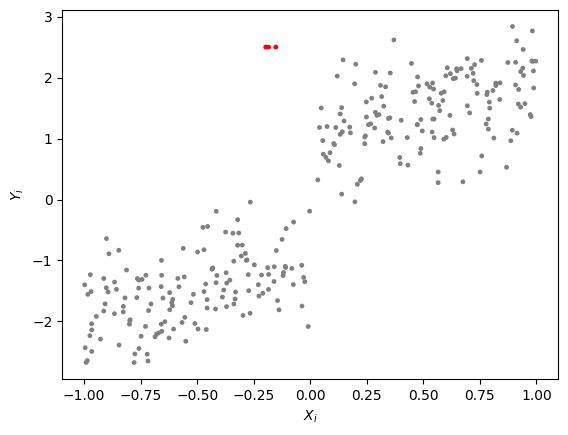

In [9]:
# Options are: 'Noak', 'Basic', 'Basic Linear'
sample = genSample('Basic Linear',300,tau=2,alpha=-1,beta=1,L=200,
                   outlier=True,outlierMethod='Simple Outside', nOutliers=3,printPlot=True)
#sample.to_csv('sample.csv')

In [11]:
param = fit('Robust Huber',sample,True)
print(param)

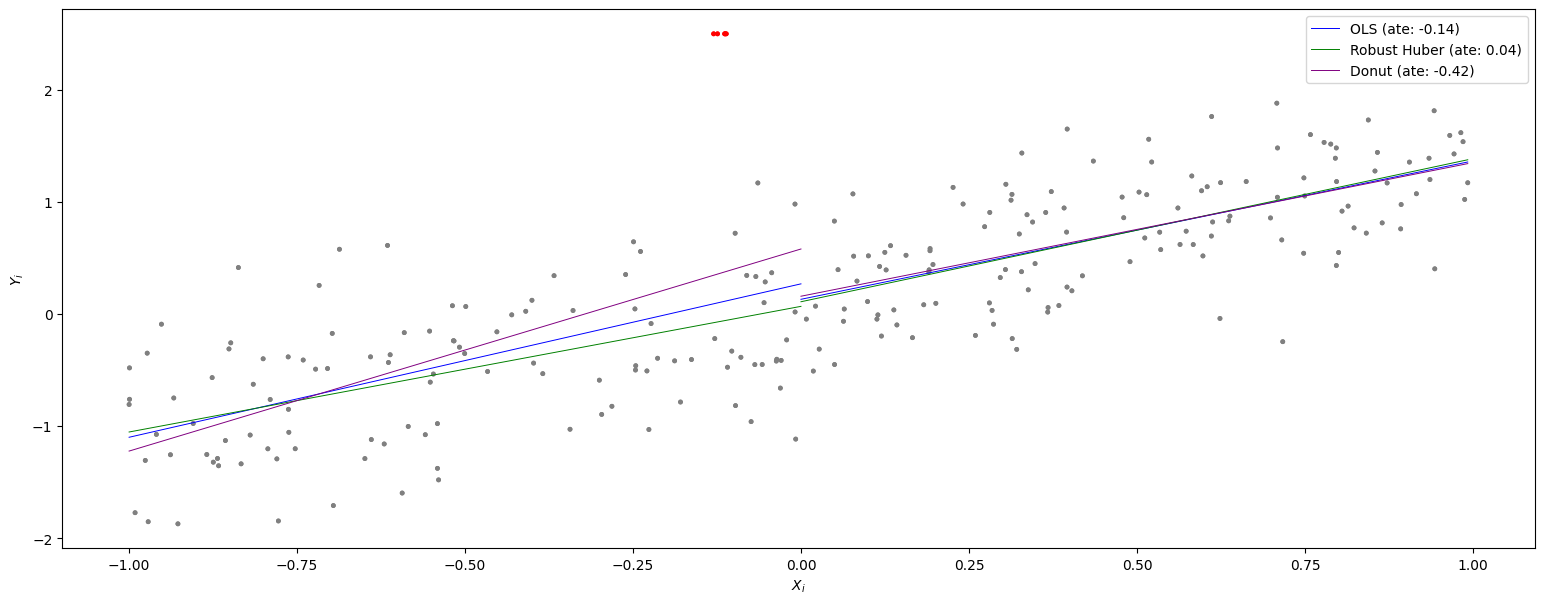

In [61]:
sample = genSample('Basic Linear',250,tau=0.3,alpha=-0.15,beta=1,L=200,
                   outlier=True,outlierMethod='Simple Outside', nOutliers=5,printPlot=False)
#sample['Xsq'] = sample.X**2
plotSplitFitComparison(sample,0,'OLS','Robust Huber','Donut')

In [15]:
#rdrobust(sample.Y,sample.X,p=1)
#rdplot(sample.Y,sample.X,p=1)

# Simulation of Treatment Effects Estimation

In [16]:
n = 1000
L = np.array([0,10,20,30,40])
tau = 2
a = -1
b = 1

In [18]:
simulationResults = simulation(10,'Basic Linear',300,tau=2,alpha=-1,beta=1,outlier=False)

In [21]:
r = 10
n = 300

results1, results2 = simulations(r,'Basic Linear',n,tau=2,alpha=-1,beta=1,cutoff=0)

# Development

In [48]:
import methods.sample as smp
import methods.rrdd as rrdd

In [49]:
sample = smp.genSample('Basic Linear',250,tau=0.3,alpha=-0.15,beta=1,L=200,
                   outlier=False,outlierMethod='Simple Outside', nOutliers=5,printPlot=False)

res = rrdd.jointFitRD('OLS',sample)
print(rrdd.splitFitRD('OLS',sample))

AttributeError: 'DataFrame' object has no attribute 'Treatment'

In [47]:
sample

,Y,X,T,Outlier
0,-0.021961,-0.910232,0,0
1,-0.144639,-0.331002,0,0
2,0.898786,0.612826,1,0
3,-1.288163,-0.586963,0,0
4,0.921100,0.870828,1,0
...,...,...,...,...
245,1.020537,0.950442,1,0
246,-0.633484,0.043920,1,0
247,-0.836711,-0.414843,0,0
248,0.060958,0.050150,1,0
